# Programming for Data Science 2024

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from libraries such as scikit-learn or Keras, in other cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to tailor the algorithm to your problem. In that sense, learning to implement algorithms is an important part of your skillset.

This is an Individual assingment, students that are caught cheating will obtain a score of 0 points.<br>
The Homeworking Assignment Three is worth 10% of your final grade.

The submission package should correspond to a .zip archive (.rar files are not acceptable) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. HTML print of your Jupyter Notebook;
3. All files outputed as part of the exercises.

The .zip archive filename should be student1ID_student2ID.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries?)
3. Readibility of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according also for your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

Submission is done through the respective Moodle activity.
Deadline is November 2nd at 12:00. 
A penality of 1 point per day late will be applied to late deliveries, with a maximum of 5 days.

Please fill the following fields: <br> <br>
**Name**: <br>
**ID**: <br>

<br> 

**Name**: <br>
**ID**: <br>


## Clustering with K-Means

K-Means is one of the most popular "clustering" algorithms, which you perhaps are already familiar from the Data Mining curricular unit. K-means estimates the location of $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

The K-means Algorithm consists in an iterative process that is roughly as follows:
1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import numpy, Scipy, and pandas using, respectively, the aliases np, sc, and pd.

In [33]:
import numpy as np
import scipy as sc
import pandas as pd

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm into different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive dataset with similar properties to the real dataset that we will be working with.<br>

Such, test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation. This allows us to have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>
As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

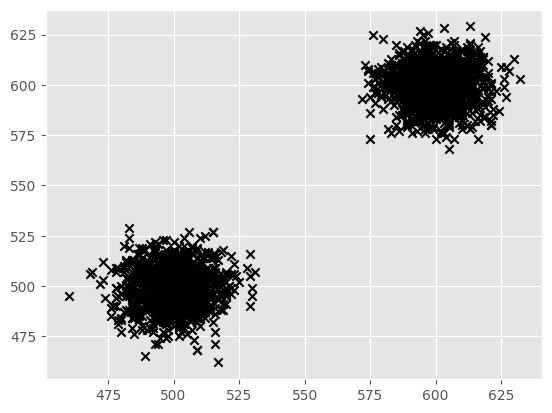

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

<b>Optional Challenge:</b> Can you write a function that generates an artificial dataset for testing purposes?<br>
We will award one extra point for students that offer a good implementation.

**Consider leaving this challenge to the very end of the assignment**

In [35]:
data_test

array([[502, 505],
       [504, 489],
       [515, 514],
       ...,
       [614, 592],
       [600, 613],
       [610, 580]])

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point cannot picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and use data_test as the** $points$

In [36]:
"""
Notes
1. Use the .random.choice numpy method to select K elements without replacing from all the rows of points array. 
The k_elements will correspond to the indexes of the selected elements 
2. Transform the indexes to the actual values of the corresponding element in points

"""

def init(points, K):
    # 1. Use the .random.choice numpy method to select K elements without replacing from all the rows of points array. The k_elements will correspond to the indexes of the selected elements 
    k_elements = np.array([np.random.choice(points.shape[0], K, replace=False)])
    
    #2 transform the indexes to the actual values of the corresponding element in points
    return np.array([data_test[element] for element in k_elements])
    

In [37]:
"""Testing the init function"""
init(data_test, 2)

array([[[491, 497],
        [516, 503]]])

### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidean distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
Assume that $p1$ and $p2$ are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. <br>


**1) Test that your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task.**

Can you write a function that computes the euclidean distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**2) Show that your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

In [38]:
a = np.array([2,3])
a.shape[0]

2

***1)***

In [39]:
"""
Notes
1. To compute the 2-dimensional euclidian distance we need to check if the 2 points share the same dimension.
2. If so, we will compute the squared differences between the x coordinates and the squared differences between the y coordinates
3. Finnaly return the squared root of the sum of the 2
"""

def distance(p1,p2):
    # 1. check if the 2 points share the same dimension
    if p1.size != p2.size:
        raise Exception("Points provided do not have the same dimension. Please try again with 2 points that have the same size")
    
    # Compute the squared differences between the x coordinates and the squared differences between the y coordinates
    x1_x2_squared = np.power(p1[0]-p2[0],2)
    y1_y2_squared = np.power(p1[1]-p2[1],2)

    # 3. return the squared root of the sum of the 2
    return np.sqrt((x1_x2_squared) +y1_y2_squared)


In [40]:
#Test variables, do not change the values
p1 = np.array([1,3])
p2 = np.array([7,2])
distance(p1,p2)

np.float64(6.082762530298219)

***2)***

In [41]:
"""
Notes
1. To compute the n-dimensional euclidian distance we need to check if the 2 points share the same dimension.
2. If so, we will compute the element wise squared differences and return it's sum
"""

def n_dim_euclidian_distance(p1,p2):
    # 1. Check if the 2 points share the same dimension
    if p1.shape[0] != p2.shape[0]:
        raise Exception("Points provided do not have the same dimension. Please try again with 2 points that have the same size")

    # 2. Compute the element wise squared differences and return it's sum
    return np.sum(np.power(p1 - p2, 2))
    

In [42]:
#Test variables, do not change the values
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

n_dim_euclidian_distance(p1,p2)

np.int64(167)

### Step 4

Write a function <b>centroid_update</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 
The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).
The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.
Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the number of clusters.

The function <b>centroid_update</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points and length K.

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [43]:
"""
Notes
1. Before initializing the centroids ndarray, we need to determine number of unique clusters and dimensions of our points
2. Afterwards we initialize the ndarray 'centroids' with zero values where the rows correspond to number of clusters and columns corresponds to the points' dimensions
3. Next, proceed with a for loop where we determine the points that belong to each cluster using a boolean array indexing
3.1 If the lengh of current cluster's points is 0, we will warn the user of this fact (raise exception error)
3.2 Otherwise, we will calculate the mean of the points column-wise and append the resulting mean to the 'centroids' ndarray
"""

def centroid_update(points, clusters):
    # 1. Determine the number of unique clusters and the number of dimensions of our points
    unique_clusters = len(list(set(clusters)))  
    dimensions = points.shape[1] 

    # 2. Initialize the 'centroids' ndarray with zeros. The array will have 'unique_clusters' rows and 'dimensions' columns
    centroids = np.zeros((unique_clusters, dimensions))

    # 3. Loop through each cluster index to calculate the centroids
    for i in range(unique_clusters):
        # 3.1. Select all points that belong to the current cluster using boolean array indexing
        cluster_points = points[clusters == i]
        
        # 3.2. If there are no points in this cluster, raise an exception
        if len(cluster_points) == 0:
            raise Exception("Centroid has no points associated with it")
        
        else:
            # 3.3. Calculate the mean of the points in the cluster along each dimension (column-wise)
            centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

In [44]:
# Test variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

cen = centroid_update(p, c)

In [45]:
cen

array([[0.44995487, 0.55986467],
       [0.53760985, 0.53912646],
       [0.8922063 , 0.26672425]])

### Step 5

Write a function <b>points_update</b> that takes two input arguments: $points$ and $centroids$.<br>
The function <b>points_update</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [46]:
"""
Notes
1. We opted to follow the suggestion given and compute the d by k distance matrix
1.1 To do that we first determine the number of centroids and number of points and initialize the distance matrix with zero values 
where the rows correspond to number of centroids and columns corresponds to the number of points

2. For each row, we will compute the distances between current point and each of the k centroids and append row to distance matrix
3. To determine the ndarray that indicates the index of the of the centroid closet to each point, we use the method argmin row-wise. 
For each row, it will dtermine the index that corresponds to the smallest value
"""

def points_update(points, centroids):
    # 1. Determine the number of centroids (rows) and the number of points (columns)
    num_centroids = centroids.shape[0]
    num_points = points.shape[0]

    # 1.1 Initialize the distance matrix with zeros. It has shape (num_points, num_centroids)
    distance_matrix = np.zeros((num_points, num_centroids))
    
    # 2. Loop through each point to compute distances to each centroid
    for i in range(num_points):
        curr_row = []  # Initialize an empty list to store distances for the current point
        
        # Compute the distance between the current point and each centroid
        for j in range(num_centroids):
            curr_row.append(distance(points[i], centroids[j]))
        
        # Assign the computed row to the corresponding row in the distance matrix
        distance_matrix[i] = curr_row

    # 3. Determine the index of the closest centroid for each point using argmin row-wise
    return np.array(np.argmin(distance_matrix, axis=1))



In [47]:
new_clusters = points_update(p, cen)
new_clusters

array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0])

In [48]:
"""
Answering the question: Why did some points became part of a different cluster after 'centroid_update' and 'points_update' ? 
The K means clustering algorithm follows the steps below
1. After deciding K value, K centroids are defined at random
2. Points will be assigned to each cluster based on the distances between each point and centroids.
3. We will then recalculate the centroid of each cluster and reassign the point again forming new clusters

This means that the inital clusters formed are based on a random selection element. 
Hence, when iteratively adjusting the initial clusters and as centroids move closer to points it's natural for points that were previously closer to one centroid to become closer to another

"""

"\nAnswering the question: Why did some points became part of a different cluster after 'centroid_update' and 'points_update' ? \nThe K means clustering algorithm follows the steps below\n1. After deciding K value, K centroids are defined at random\n2. Points will be assigned to each cluster based on the distances between each point and centroids.\n3. We will then recalculate the centroid of each cluster and reassign the point again forming new clusters\n\nThis means that the inital clusters formed are based on a random selection element. \nHence, when iteratively adjusting the initial clusters and as centroids move closer to points it's natural for points that were previously closer to one centroid to become closer to another\n\n"

### Step 6

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>
The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidean distance between the old and new positions of each centroid. This will give us a quantity that tell us whether our algorithm is still converging to the solution or got to good approximation. We will use a tolerance threshold in the average change in the centroids positions to make this decision.

**Test your function then report the distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters.**

In [49]:
cen_new = centroid_update(p, new_clusters)
cen_new

array([[0.30502407, 0.52825455],
       [0.71561869, 0.73639286],
       [0.81022182, 0.18605104]])

In [50]:
"""
Notes
1.Understanding the threshold concept applied to the average euclidian distance
1.1 The tolerance threshold is a small predefined value.
1.2 If the average distance falls below this threshold, it indicates that the centroids have moved very little between iterations. Hence we stop the iterative process
"""

'\nNotes\n1.Understanding the threshold concept applied to the average euclidian distance\n1.1 The tolerance threshold is a small predefined value.\n1.2 If the average distance falls below this threshold, it indicates that the centroids have moved very little between iterations. Hence we stop the iterative process\n'

In [51]:
"""
Notes
1. Start by determining whether the ndarrays corresponding to oldcentroids and newcentroids have the same shape (same number of clusters(.shape[0]) and same dimensions (.shape[1]))
2. If so, for each centroid determine the euclidean distance between the old and new coordinates. This will result in a 1-D ndarray with K values
3. Finally, return the mean of the computed euclidian distances
"""

def error (oldcentroids, newcentroids):
    # 1. Determine whether the ndarrays corresponding to oldcentroids and newcentroids have the same shape
    if oldcentroids.shape != newcentroids.shape:
        raise Exception("Shape of centroids doesn't match. Please check")
    
    # 2. For each centroid determine the euclidean distance between the old and new coordinates. This will result in a 1-D ndarray with K values
    euc_distances = np.array([distance(oldcentroids[i], newcentroids[i])  for i in range(oldcentroids.shape[0])])

    # 3. Return the mean of the computed euclidian distances
    return euc_distances.mean()

In [55]:
avg_euclidean_distance = error(cen, cen_new)
avg_euclidean_distance
print(f"The distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters is {avg_euclidean_distance}")


The distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters is 0.17635560837965428


### Step 7

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous Steps to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

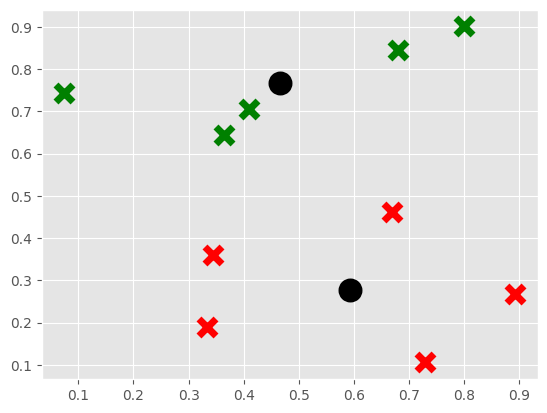

In [53]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

### Step 8

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is an 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared distance** of the points to the centroid of the cluster they are assigned.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the quantities that you computed above in the different steps**

### Step 9

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).

<img src="images/example_plot.png" alt="Alt text" width="700"/>